In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error

data = pd.read_csv("/content/stock.csv")

data.drop_duplicates(keep='first' , inplace = True)


data.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5168
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5169 non-null   object 
 1   Open       5169 non-null   float64
 2   High       5169 non-null   float64
 3   Low        5169 non-null   float64
 4   Close      5169 non-null   float64
 5   Adj Close  5169 non-null   float64
 6   Volume     5169 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 323.1+ KB


In [ ]:
x = data.iloc[ : , 1 : -1].values
y = data.iloc[ : , -1].values



x = normalize(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1 , random_state = 32 )

reg = LinearRegression()
reg.fit(x_train,y_train)

y_pre = reg.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pre)

0.5484954731395457

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pre)


931641.0856195906

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg2 = DecisionTreeRegressor(random_state = 0)
reg2.fit(x_train,y_train)
y_tree = reg2.predict(x_test)

mean_absolute_error(y_test,y_tree)

881627.0793036751

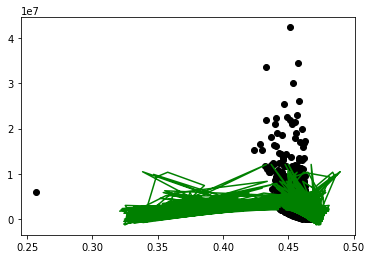

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_train[ : , 2],y_train, color = "black")
plt.plot(x_test,y_pre, color = "green")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


x_new = SelectKBest(chi2 , k = 5).fit_transform(x,y)

xn_train, xn_test , yn_train , yn_test = train_test_split(x_new,y, test_size = 0.05 , random_state = 1)
reg2 = LinearRegression()
reg2.fit(xn_train,yn_train)

yn_pre = reg.predict(xn_train)

reg2.score(xn_test,yn_test)

0.6590500503993932

In [ ]:
from sklearn.svm import SVC

s = SVC()
s.fit(x_train,y_train)

sm_predict = s.predict(x_test)

print(mean_absolute_error(y_test,sm_predict))


1092428.0464216634


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors= 60)

kn_reg.fit(x_train,y_train)

kn_reg.score(x_test,y_test)

0.6105041308272336

In [ ]:
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()
Gnb.fit(x_train,y_train)

pre = Gnb.predict(x_test)

print(mean_absolute_error(y_test,pre))


940937.330754352


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(random_state= 42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True,)

rfg.fit(x_train,y_train)
rfg_pre = rfg.predict(x_test)

print(mean_absolute_error(y_test, rfg_pre))
print(rfg.oob_score_)

785404.9925063415
0.5119830757663016


In [ ]:
##########################################################################

In [ ]:
dataset = pd.read_csv("OIL (1).csv")

dataset.drop_duplicates(keep='first' , inplace = True)

#dataset.drop(dataset[(dataset['Volume'] == 0)].index , inplace = True)


dataset.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 2650 entries, 0 to 2649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2650 non-null   object 
 1   Open       2650 non-null   float64
 2   High       2650 non-null   float64
 3   Low        2650 non-null   float64
 4   Close      2650 non-null   float64
 5   Adj Close  2650 non-null   float64
 6   Volume     2650 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.6+ KB


In [ ]:
a = dataset.iloc[:, 1:-1].values
b = dataset.iloc[:, -1]


a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)
reg1 = LinearRegression()
reg1.fit(a_train, b_train)
b_predict = reg1.predict(a_test)

In [ ]:
mean_absolute_error(b_test, b_predict)


19633.748581919997

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pol = PolynomialFeatures(degree = 3)
a_pol = pol.fit_transform(a_train)
a_test_pol = pol.fit_transform(a_test)

reg1.fit(a_pol , b_train)
b_pol = reg1.predict(a_test_pol)

print(mean_absolute_error(b_test,b_pol))


15730.482826373129


In [ ]:
r2_score(b_test,b_pol)

0.540499686265161

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state = 0 )
tree.fit(a_train,b_train)

b_tree_pre = tree.predict(a_test)

mean_absolute_error(b_test, b_tree_pre)

20438.78706199461

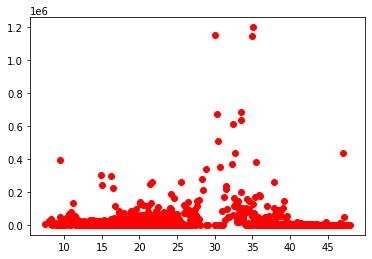

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(a_train[ : , 0],b_train, color = "red")
#plt.plot(a_pol ,b_pol , color = "black")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(random_state= 0, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True,)

rfg.fit(a_train,b_train)
rfg_pre = rfg.predict(a_test)

print(mean_absolute_error(b_test, rfg_pre))
print(rfg.oob_score_)

16414.690161156035
0.22267357098523832


In [ ]:
from sklearn.naive_bayes import GaussianNB

Gnb = GaussianNB()
Gnb.fit(a_train,b_train)

pre = Gnb.predict(a_test)

print(mean_absolute_error(b_test,pre))

27936.98113207547


In [ ]:
from sklearn.svm import SVC

s = SVC()
s.fit(a_train,b_train)

sm_predict = s.predict(a_test)

print(mean_absolute_error(b_test,sm_predict))


16471.509433962263


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor(n_neighbors= 60)

kn_reg.fit(x_train,y_train)

kn_reg.score(x_test,y_test)

0.6105041308272336

In [ ]:
################################################

In [ ]:
data = pd.read_csv("/content/train.csv")

q = data.iloc[ : , 1].values
e = data.iloc[ : , -1].values

data.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_e = LabelEncoder()
e = lab_e.fit_transform(e)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(q)
q_vec = cv.transform(q)

print(q_vec.shape)

(8695, 18177)


In [ ]:
from sklearn.linear_model import LogisticRegression
reg0 = LogisticRegression()

reg0.fit(q_vec,e)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
ds = pd.read_csv("/content/test.csv")

w = ds.iloc[ : , 1].values
r = ds.iloc[ : , -1].values

lab_r = LabelEncoder()
r = lab_e.fit_transform(r)

w_vec = cv.transform(w)

pre = reg0.predict(w_vec)

print(r2_score(r , pre))

0.47757862914671745


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer()
tfid.fit(q)
q_tf = tfid.transform(q)

In [ ]:
reg0.fit(q_tf,e)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
w_tf = tfid.transform(w)

tf_pre = reg0.predict(w_tf)

print(r2_score(r , tf_pre))

0.496337026663891


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(r,tf_pre)
cm

array([[528,  57,  29],
       [ 66, 412,  28],
       [ 56,  46, 364]])

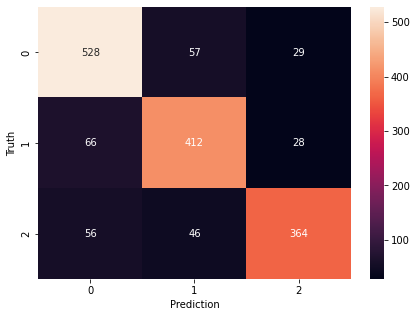

In [ ]:
import seaborn as sns
plt.figure(figsize= (7,5))
sns.heatmap(cm , annot = True , fmt = 'g')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
ra_fo = KNeighborsRegressor(n_neighbors= 50)

ra_fo.fit(q_tf,e)

KN_pre = ra_fo.predict(w_tf)

print(r2_score(r,KN_pre))

0.31202151467554806


In [ ]:
from sklearn.svm import SVC

s = SVC()
s.fit(q_tf,e)

sm_predict = s.predict(w_tf)

print(r2_score(r,sm_predict))

0.5075920651741952


In [ ]:
##################################################################

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')

data.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"],axis = 1,inplace = True)
data.rename(columns = { "v2" : "text" , "v1" :  "label"} , inplace = True)

In [ ]:
txt = data.iloc[ : , 1].values
lbl = data.iloc[ : , 0].values

lbl_enc = LabelEncoder()
lbl = lbl_enc.fit_transform(lbl)

vectorizer = CountVectorizer()

txt_cv = vectorizer.fit_transform(txt)

txt_train,txt_test , lbl_train , lbl_test = train_test_split(txt_cv,lbl, test_size= 0.3 , random_state = 32)

svm = SVC()

svm.fit(txt_train,lbl_train)
svm_pre = svm.predict(txt_test)

print(svm.score(txt_test,lbl_test))

0.9820574162679426


In [ ]:
cm = confusion_matrix(lbl_test,svm_pre)
cm

array([[1451,    0],
       [  30,  191]])

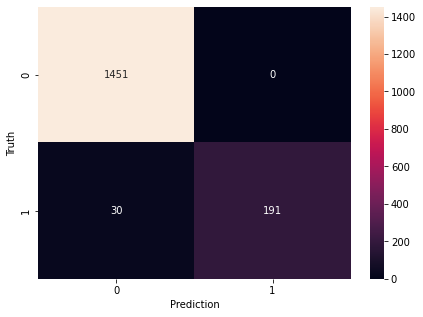

In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot =True , fmt = 'g')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [ ]:
vect = TfidfVectorizer()
txt_tf = vect.fit_transform(txt)

txt_tf_train,txt_tf_test , lbl_train , lbl_test = train_test_split(txt_tf,lbl, test_size= 0.3 , random_state = 32)

svm = SVC()

svm.fit(txt_tf_train,lbl_train)
svm_pre = svm.predict(txt_tf_test)

print(svm.score(txt_tf_test,lbl_test))


0.9820574162679426


In [ ]:
cm = confusion_matrix(lbl_test,svm_pre)
cm

array([[1451,    0],
       [  30,  191]])

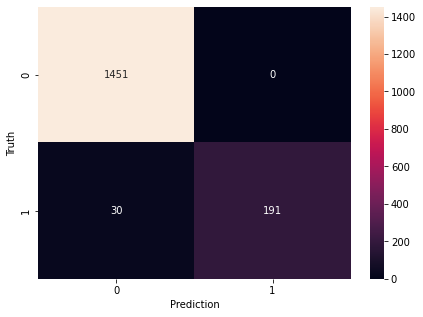

In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot =True , fmt = 'g')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()